[*********************100%***********************]  1 of 1 completed


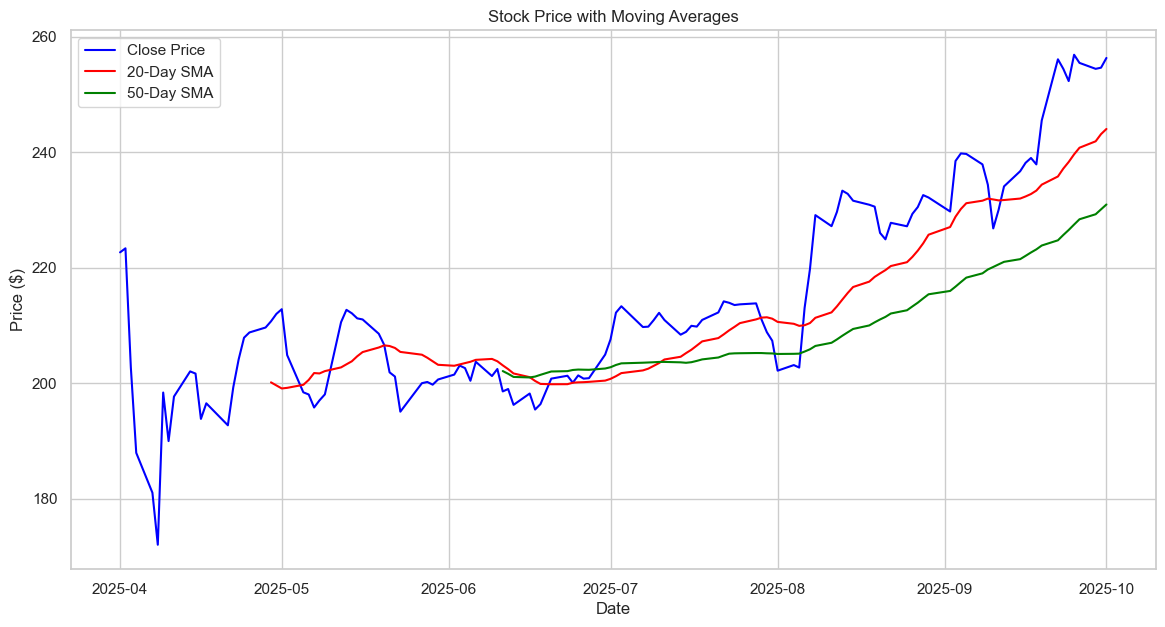

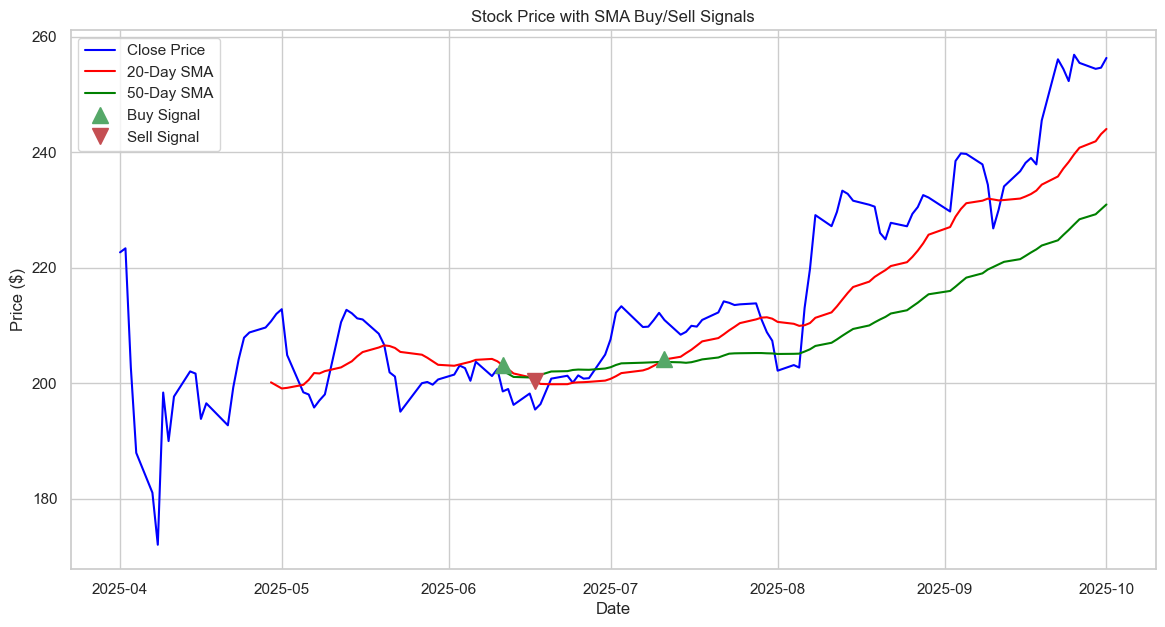

In [13]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

ticker = "AAPL"

# Download stock data for past 6 months
data = yf.download(ticker, period="6mo", interval="1d", auto_adjust=True)

# Calculate moving averages
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Plot Close price and SMAs
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_20'], label='20-Day SMA', color='red')
plt.plot(data['SMA_50'], label='50-Day SMA', color='green')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Create Signals column: 1 = buy, 0 = hold
data['Signal'] = 0
# Signal: 1 when SMA_20 > SMA_50, 0 otherwise
data['Signal'] = (data['SMA_20'] > data['SMA_50']).astype(int)

# Position: 1 = buy, -1 = sell, only at crossover points
data['Position'] = data['Signal'].diff()



# Plot Close price, SMAs, and buy/sell signals
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_20'], label='20-Day SMA', color='red')
plt.plot(data['SMA_50'], label='50-Day SMA', color='green')

# Buy signals
plt.plot(data[data['Position']==1].index, 
         data.loc[data['Position']==1, 'SMA_20'], 
         '^', markersize=12, color='g', label='Buy Signal')

# Sell signals
plt.plot(data[data['Position']==-1].index, 
         data.loc[data['Position']==-1, 'SMA_20'], 
         'v', markersize=12, color='r', label='Sell Signal')

plt.title('Stock Price with SMA Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()
